In [41]:
import duckdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
# Open the DuckDB connection, to the persistent database
con = duckdb.connect(".config/nfl.duckdb")
con.close()

In [ ]:
# Test converting the play outcomes to just yards gained or lost
con.sql("""
    SELECT *
    FROM gold.plays_numeric   
""")

In [24]:
# Can still utilize plays_numeric, just won't use the categorical outcomes as the target
X = con.sql("""
    SELECT yardlineNumber, offenseFormation, receiverAlignment, playType, defensiveFormation, pff_manZone
    FROM gold.plays_numeric   
""").df()
y = con.sql("""
    SELECT yardsGained
    FROM gold.plays_numeric   
""").df()

In [35]:
# Train test split
# May need to come back and apply a Standard Scaler later

linreg = LinearRegression()
scaler = StandardScaler()
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.7, random_state = 123)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [36]:
# Fit the model
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
# Begin testing and scoring
y_pred = linreg.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MSE: 80.63310622289697
R2 Score: 0.02277208083008464


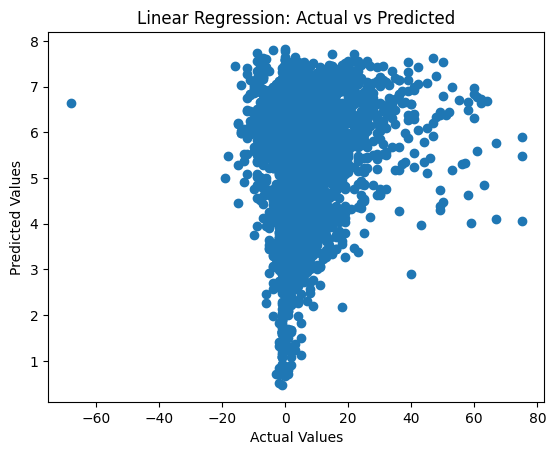

Coefficients: [[ 0.05041481  0.32550574  0.04088819  1.77381568 -0.0198335  -0.16104852]]


In [30]:
plt.scatter(y_val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

coefficients = linreg.coef_
print(f"Coefficients: {coefficients}")


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_val_scaled)
print(f"Ridge MSE: {mean_squared_error(y_val, y_pred_ridge)}")


Ridge MSE: 80.63311884052399
